In [1]:
# cifar10 이라는 데이터셋이 있움 # 소형 컬러이미지데이터셋 32*32 RGB 60000
# test data와

# class_names = [
#     'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
#     'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
# ]

# 첫 번째 ~ 12개의 이미지를 아래처럼 출력해주세요

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Train Data Size: (50000, 32, 32, 3)
Test Data Size (10000, 32, 32, 3)


<ipython-input-3-e859c7840d89>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(train_labels[i])])


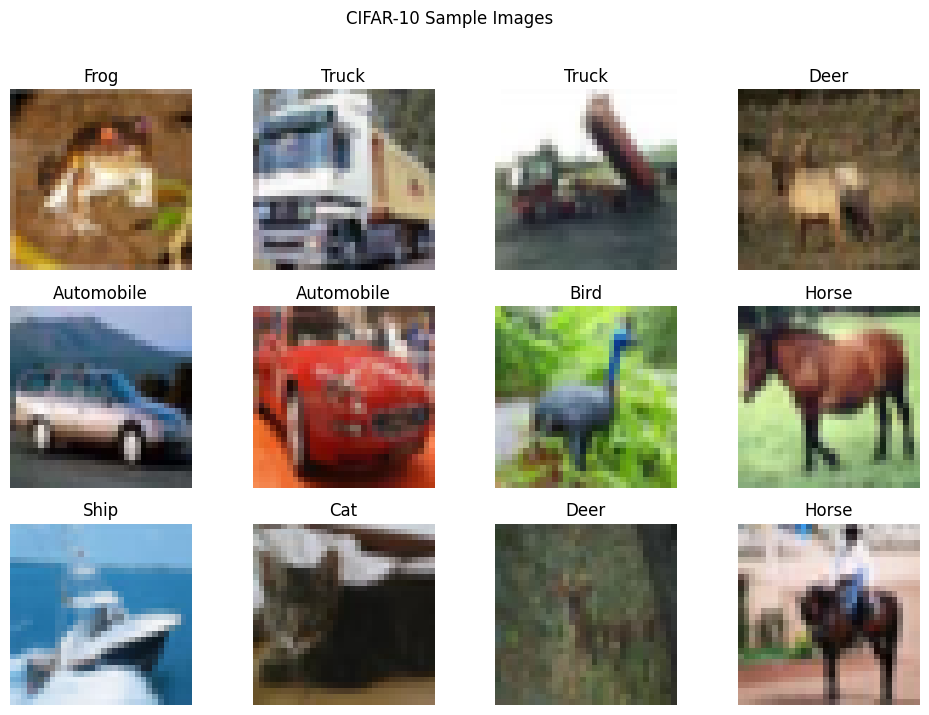

In [3]:
import numpy as np
import matplotlib.pyplot as plt

cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

train_size = train_images.shape
test_size = test_images.shape
print("Train Data Size:", train_size)
print("Test Data Size", test_size)


plt.figure(figsize=(12, 8))
for i in range(12) :
  plt.subplot(3, 4, i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[int(train_labels[i])])
  plt.axis('off')

plt.suptitle('CIFAR-10 Sample Images')
plt.show()

In [5]:
cifar10 = tf.keras.datasets.cifar10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
# y_train = np.expand_dims(y_train, -1)
# y_test = np.expand_dims(y_test, -1)

In [7]:
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]


In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

<ipython-input-10-71b12558f5ac>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


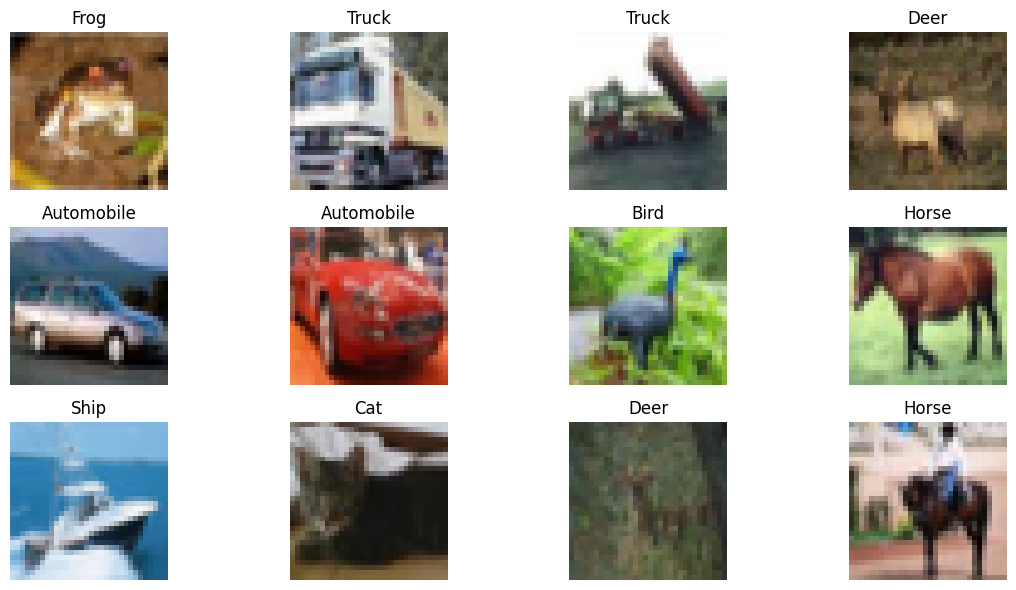

In [10]:
plt.figure(figsize=(12, 6))
for i in range(12) :
  plt.subplot(3, 4, i + 1)
  plt.imshow(x_train[i])
  plt.title(class_names[int(y_train[i])])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
# 합성곡 신경망(CNN)을 구축하여 모델을 트레이닝하고, loss와 accurac를 그래프로 나타세요

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train Data Size: (50000, 32, 32, 3)
Test Data Size (10000, 32, 32, 3)


<ipython-input-3-e859c7840d89>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(train_labels[i])])


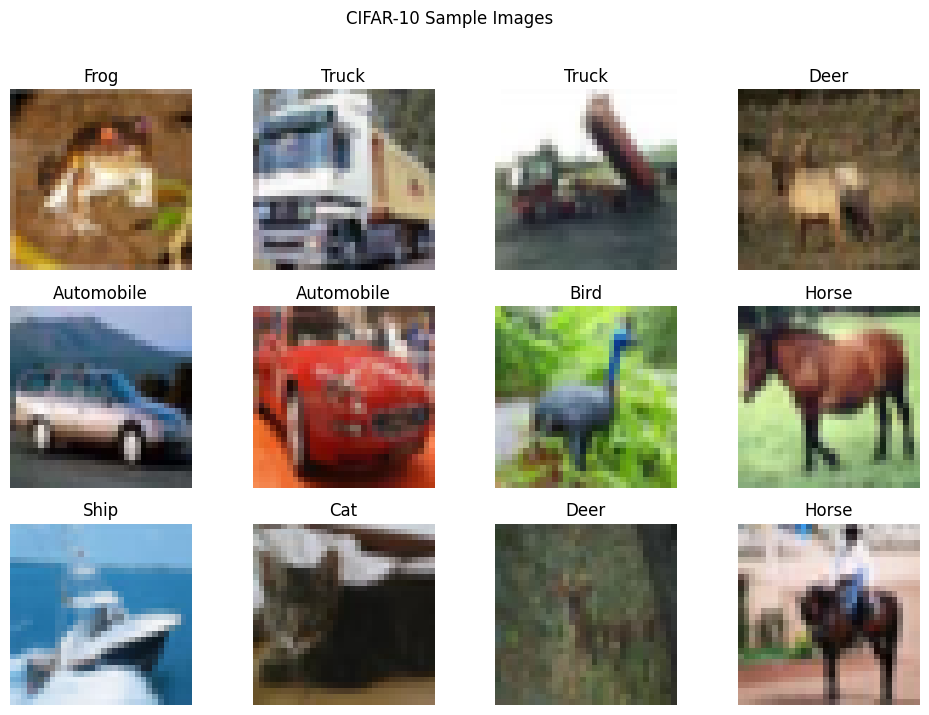

In [3]:
import numpy as np
import matplotlib.pyplot as plt

cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

train_size = train_images.shape
test_size = test_images.shape
print("Train Data Size:", train_size)
print("Test Data Size", test_size)


plt.figure(figsize=(12, 8))
for i in range(12) :
  plt.subplot(3, 4, i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[int(train_labels[i])])
  plt.axis('off')

plt.suptitle('CIFAR-10 Sample Images')
plt.show()

In [8]:
print(train_images.shape)
print(train_labels[:,0])
print(train_labels.shape)

(50000, 32, 32, 3)
[6 9 9 ... 9 1 1]
(50000, 1)


In [ ]:
i = Input(shape = train_images[0].shape)

In [20]:
type(i)

keras.src.backend.common.keras_tensor.KerasTensor

In [21]:
type(train_images)

numpy.ndarray

In [23]:
type(train_images.shape)

tuple

In [11]:
train_images[0].shape

(32, 32, 3)

In [4]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [5]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)

(50000, 32, 32, 3)


In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # 정규화 : 0 ~ 255 --> 0 ~ 1 흑백
# relu : relu(x) = max(0, x) : 0보다 크면 x값 그대로 추출, 0보다 작으면 0으로 출력
y_train, y_test = y_train.flatten(), y_test.flatten() # 2차원 (50000, 1) => 1차원 벡터로 변경 (50000,)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

print(len(set(y_train)))

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)
10


In [7]:
K = len(set(y_train))

In [9]:
i = Input(shape = x_train[0].shape) # 32×32×3
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.5)(x) # 이렇게 해야 가장 정확하다
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3475 - loss: 1.7681 - val_accuracy: 0.5334 - val_loss: 1.2675
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5307 - loss: 1.2967 - val_accuracy: 0.5856 - val_loss: 1.1654
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.5863 - loss: 1.1545 - val_accuracy: 0.6280 - val_loss: 1.0560
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.6251 - loss: 1.0461 - val_accuracy: 0.6667 - val_loss: 0.9554
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 49ms/step - accuracy: 0.6533 - loss: 0.9627 - val_accuracy: 0.6854 - val_loss: 0.9008
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6822 - loss: 0.8881 - val_accuracy: 0.6854 - val_loss: 0.8980
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.6986 - loss: 0.8414 - val_accuracy: 0.6959 - val_loss: 0.8763
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.7157 -

In [12]:
# loss, accuracy 그래프화
# confusion matrix 시각화

import numpy as np
import matplotlib.pyplot as plt

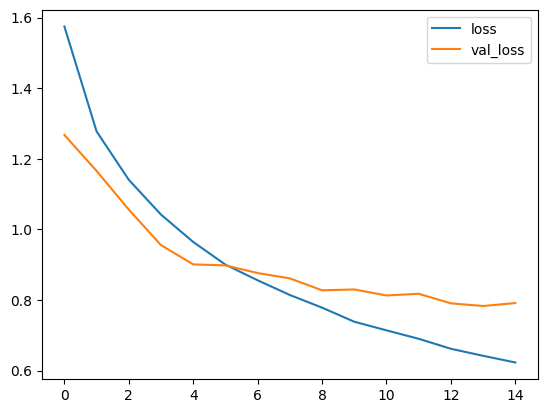

In [14]:
plt.plot(r.history['loss'], label='loss') # 트레이닝 한 거
plt.plot(r.history['val_loss'], label='val_loss') # 검증해가면서 한 것
plt.legend()

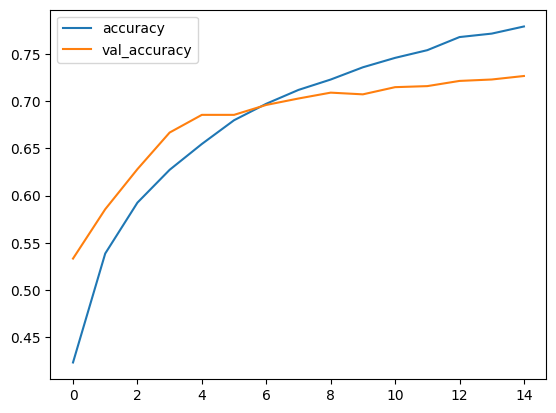

In [15]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Confusion matrix, without normalization
[[745  16  35  15  27   9   9  14  95  35]
 [ 14 855   2   5   5   4  11   4  27  73]
 [ 65   6 516  71 139  72  79  26  14  12]
 [ 16   6  36 529 100 185  80  21  13  14]
 [ 26   4  33  55 742  34  51  46   6   3]
 [  7   3  25 196  65 621  33  39   3   8]
 [  5   5  14  49  53  21 839   3   5   6]
 [ 15   0  18  53  79  52  13 755   5  10]
 [ 42  22   7  20  11   6   7   5 857  23]
 [ 30  85   5  16   6  10   5  13  24 806]]


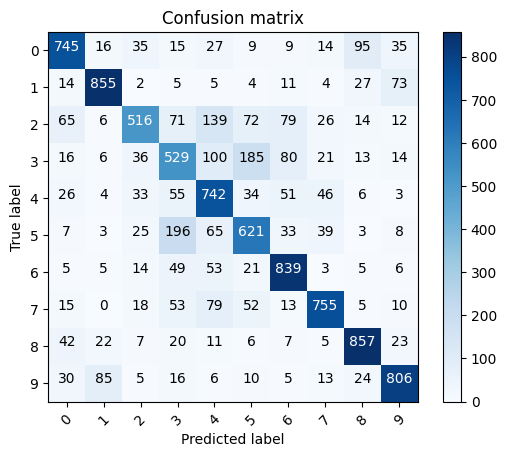

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [28]:
labels = '''airplane,
automobile,
bird,
cat,
deer,
dog,
frog,
horse,
ship,
truck.
'''.split()
print(labels)

['airplane,', 'automobile,', 'bird,', 'cat,', 'deer,', 'dog,', 'frog,', 'horse,', 'ship,', 'truck.']


Text(0.5, 1.0, 'True label: ship, Predicted: airplane,')

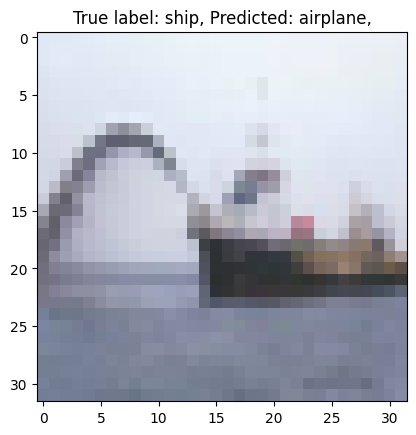

In [32]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))